In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("spotify2023.csv", encoding = "Latin-1" )

In [3]:
# track_name: Name of the song
# artist(s)_name: Name of the artist(s) of the song
# artist_count: Number of artists contributing to the song
# released_year: Year when the song was released
# released_month: Month when the song was released
# released_day: Day of the month when the song was released
# in_spotify_playlists: Number of Spotify playlists the song is included in
# in_spotify_charts: Presence and rank of the song on Spotify charts
# streams: Total number of streams on Spotify
# in_apple_playlists: Number of Apple Music playlists the song is included in
# in_apple_charts: Presence and rank of the song on Apple Music charts
# in_deezer_playlists: Number of Deezer playlists the song is included in
# in_deezer_charts: Presence and rank of the song on Deezer charts
# in_shazam_charts: Presence and rank of the song on Shazam charts
# bpm: Beats per minute, a measure of song tempo
# key: Key of the song
# mode: Mode of the song (major or minor)
# danceability_%: Percentage indicating how suitable the song is for dancing
# valence_%: Positivity of the song's musical content
# energy_%: Perceived energy level of the song
# acousticness_%: Amount of acoustic sound in the song
# instrumentalness_%: Amount of instrumental content in the song
# liveness_%: Presence of live performance elements
# speechiness_%: Amount of spoken words in the song

In [4]:
# Drop Na's
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            816 non-null    object
 1   artist(s)_name        816 non-null    object
 2   artist_count          816 non-null    int64 
 3   released_year         816 non-null    int64 
 4   released_month        816 non-null    int64 
 5   released_day          816 non-null    int64 
 6   in_spotify_playlists  816 non-null    int64 
 7   in_spotify_charts     816 non-null    int64 
 8   streams               816 non-null    int64 
 9   in_apple_playlists    816 non-null    int64 
 10  in_apple_charts       816 non-null    int64 
 11  in_deezer_playlists   816 non-null    object
 12  in_deezer_charts      816 non-null    int64 
 13  in_shazam_charts      816 non-null    object
 14  bpm                   816 non-null    int64 
 15  key                   816 non-null    ob

In [6]:
# shape 817 rows and 24 columns

In [7]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [11]:
# renaming columns
data = data.rename(columns={'danceability_%':'danceability','valence_%':'valence','energy_%':'energy','acousticness_%':'acousticness','instrumentalness_%':'instrumentalness','liveness_%':'liveness', 'speechiness_%':'speechiness'})

In [12]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [8]:
# Exploratory data analysis

In [9]:
# Counting the number of unique artists in the dataset
unique_artists = data["artist(s)_name"].unique()
len(unique_artists)

570

In [14]:
import numpy as np

In [15]:
data["streams"] = np.int64(data['streams'])

In [16]:
num_streams = np.int64(data['streams'])

In [17]:
num_of_streams = pd.Series(num_streams)

In [18]:
# summary statistics for number of streams 
num_of_streams.describe()

count    8.160000e+02
mean     4.689858e+08
std      5.231267e+08
min      2.762000e+03
25%      1.342848e+08
50%      2.638368e+08
75%      6.011986e+08
max      3.562544e+09
dtype: float64

In [19]:
# understanding how many songs each artist has in the data set
data["artist(s)_name"].value_counts().head(10)

Taylor Swift        29
SZA                 17
Bad Bunny           16
The Weeknd          15
Kendrick Lamar      12
Harry Styles        12
Morgan Wallen        9
Feid                 8
Drake, 21 Savage     7
BTS                  7
Name: artist(s)_name, dtype: int64

In [20]:
Taylor_swift_songs = data[data["artist(s)_name"] == "Taylor Swift"]

In [30]:
 Taylor_swift_songs["track_name"] = Taylor_swift_songs["track_name"].str.replace(r"\(.*?\)|\[.*?\]", "", regex=True)

C:\Users\afari\AppData\Local\Temp\ipykernel_16500\2616778666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Taylor_swift_songs["track_name"] = Taylor_swift_songs["track_name"].str.replace(r"\(.*?\)|\[.*?\]", "", regex=True)


In [51]:
Taylor_swift_songs["track_name"]

3                                 Cruel Summer
21                   I Can See You  (From The 
33                                   Anti-Hero
37                                 Blank Space
38                                       Style
66                                       Karma
69                                  Enchanted 
83                           Back To December 
93                            Donï¿½ï¿½ï¿½t Bl
100                                      Lover
113                                      Mine 
119                                     august
163                                  Enchanted
176                               Shake It Off
191    You Belong With Me (Taylorï¿½ï¿½ï¿½s Ve
193                       Better Than Revenge 
206                             Hits Different
237                              Lavender Haze
270          All Of The Girls You Loved Before
437                    You're On Your Own, Kid
487                                     Maroon
489          

In [58]:
 Taylor_swift_songs["track_name"] = Taylor_swift_songs["track_name"].str.replace(r"ï¿½ï¿½ï¿½", "", regex=False)

C:\Users\afari\AppData\Local\Temp\ipykernel_16500\1730249595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Taylor_swift_songs["track_name"] = Taylor_swift_songs["track_name"].str.replace(r"ï¿½ï¿½ï¿½", "", regex=False)


In [59]:
 Taylor_swift_songs["track_name"] = Taylor_swift_songs["track_name"].str.replace(r"(Taylorï¿½ï¿½ï¿½s Ve", "", regex=False)

C:\Users\afari\AppData\Local\Temp\ipykernel_16500\3134605411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Taylor_swift_songs["track_name"] = Taylor_swift_songs["track_name"].str.replace(r"(Taylorï¿½ï¿½ï¿½s Ve", "", regex=False)


In [60]:
from matplotlib.ticker import ScalarFormatter

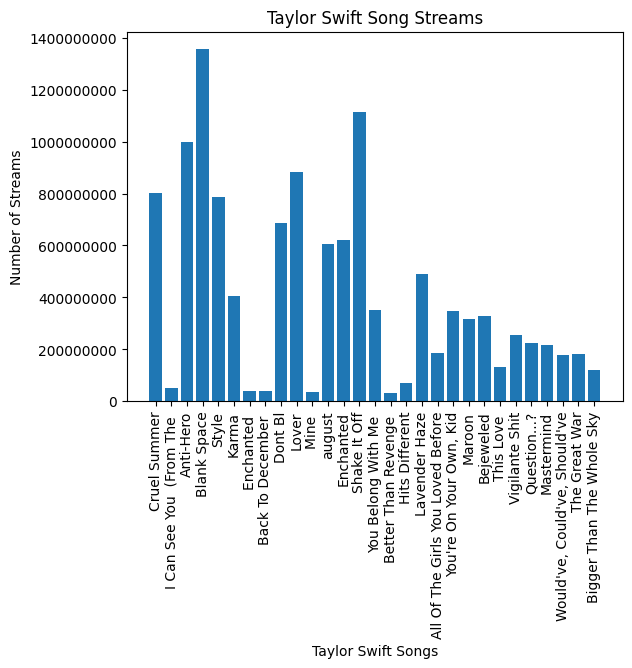

In [61]:
plt.bar(Taylor_swift_songs['track_name'], Taylor_swift_songs['streams']);
plt.xticks(rotation=90, ha='center')
plt.xlabel('Taylor Swift Songs')
plt.ylabel('Number of Streams')
plt.title('Taylor Swift Song Streams')
y_formatter = ScalarFormatter(useOffset=False, useMathText=False)
y_formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(y_formatter)

In [62]:
lowest_streams = Taylor_swift_songs[Taylor_swift_songs["streams"] == Taylor_swift_songs["streams"].min()] 

In [63]:
# song with lowest number of streams
lowest_streams

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
193,Better Than Revenge,Better Than Revenge,1,2023,7,7,86,11,30343206,3,...,146,B,Minor,50,67,89,0,0,19,8


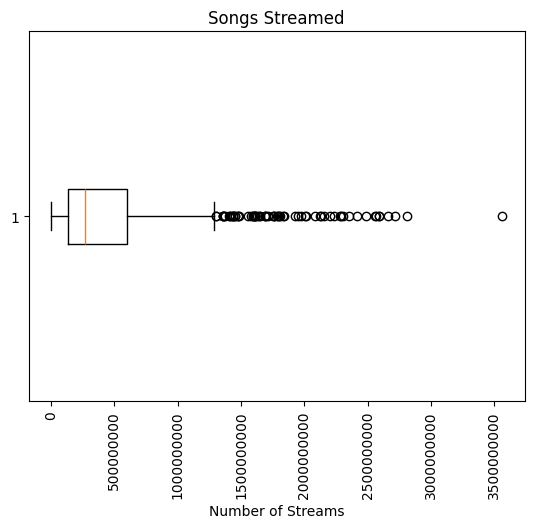

In [64]:
plt.boxplot(data["streams"], vert = False)
plt.xlabel('Number of Streams')
plt.title('Songs Streamed')
plt.xticks(rotation=90, ha='center') 
x_formatter = ScalarFormatter(useOffset=False, useMathText=False)
x_formatter.set_scientific(False)

plt.gca().xaxis.set_major_formatter(x_formatter)

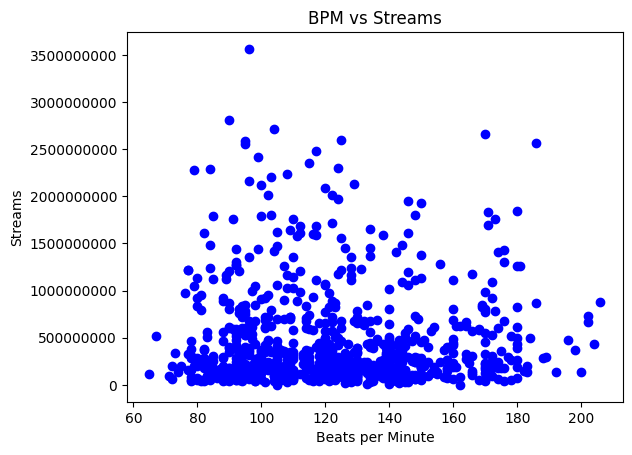

In [65]:
plt.scatter(data['bpm'], data['streams'], color = "b")
plt.xlabel('Beats per Minute')
plt.ylabel('Streams')
plt.title("BPM vs Streams")
y_formatter = ScalarFormatter(useOffset=False, useMathText=False)
y_formatter.set_scientific(False)
plt.gca().yaxis.set_major_formatter(y_formatter)

In [69]:
bpm_streams = data['bpm'].corr(data['streams'])

In [70]:
bpm_streams

-0.025693846505562057